Adam Ten Hoeve, Jared Pino, Joseph Plata  
COMP 4431 - Data Mining  
Assignment 10

In [29]:
# Load necesary packages
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Last time we looked at the iris dataset, we wanted to compare different clustering models. This time, we're going to shift our focus to classification models and, in particular, see how a naive bayes model performs in comparision with other classification models. 

As always, let's start by loading in our data. From our prior analysis, we know that there are no missing or mislabeled values in the dataset. We also do some feature engineering, adding calculations for the areas of the petals and sepals of each plant.

In [2]:
# Load the data
iris = load_iris()
target_names = iris["target_names"]
data = iris["data"]
target = iris["target"]
feature_names = iris["feature_names"]

# Store the data in a pandas dataframe
iris = pd.DataFrame(data)
iris.columns = feature_names
iris["species"] = target
iris["species"] = iris["species"].astype("category")

# Feature Engineering: Calculate the petal area, sepal area, and total area
iris['sepal area (cm^2)'] = iris['sepal length (cm)'] * iris['sepal width (cm)']
iris['petal area (cm^2)'] = iris['petal length (cm)'] * iris['petal width (cm)']
iris['total area (cm^2)'] = iris['petal area (cm^2)'] * iris['sepal area (cm^2)']

We will also scale the data, which should help prevent any issues that arrize from unit conversions.

In [70]:
# Create a series of just the labels
y = iris['species']
# Create a dataframe without the class labels.
X = iris.drop('species', axis=1)
# Scale the features
X = MinMaxScaler().fit_transform(X)

Before we go to modelling, we should think about the assumption that the predictors are independent. It makes intuitive sense that a petal's length and width may be related, as well as their sepal lengths and widths. Let's plot these relations to see if that is true. If there is a structure to this plot, we can infer that the predictors aren't indepedent.

In [75]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'sepal area (cm^2)', 'petal area (cm^2)',
       'total area (cm^2)'],
      dtype='object')

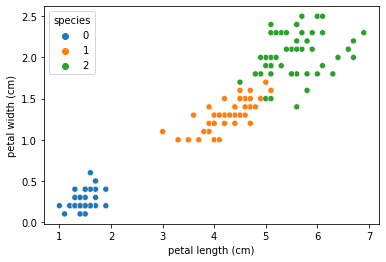

In [76]:
sns.scatterplot(x=iris["petal length (cm)"], y=iris["petal width (cm)"], hue=iris["species"])

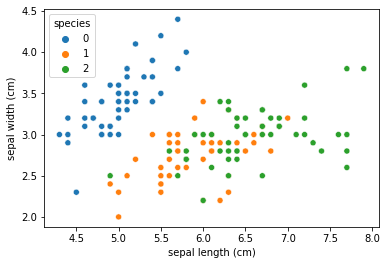

In [77]:
sns.scatterplot(x=iris["sepal length (cm)"], y=iris["sepal width (cm)"], hue=iris["species"])

There is a distinct structure between the petal's length and width, which probably means the two are not entirely independent. This is a shame for our Naive Bayes algorithm, as it requires all predictors to be independent of each other. However, a Naive Bayes model may still work, so let's create one and see how it preforms. It's easy enough to create such a model using Scikit-Learn's builtin methods.

In [46]:
# Fit a Naive Bayes Classifier to the iris dataset
nb_clf = GaussianNB()
nb_clf.fit(X, y)
# Determine how well the model does on a validation set
y_pred_nb = nb_clf.predict(X)

# Print the results of the test
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_nb))
print("Naive Bayes report: \n\n", classification_report(y, y_pred_nb))
nb_acc = round((np.sum(y_pred_nb == y)) / len(y), 2)
print("Test Accuracy: {}%".format(nb_acc*100))

Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
Naive Bayes report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Test Accuracy: 95.0%


The Naive Bayes classifier gives us a $95\%$ classification accuracy, with only seven misclassified labels between classes 2 and 3. That's really good, but it's still helpful to see how other models perform at the task. The other classification models we will look at include Decision Trees, K-Nearest Neighbors, Random Forests, and Logistic Regression.

In [47]:
# Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

y_pred_dt = dt_clf.predict(X)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_dt))
print("Decision Tree Classifier report: \n\n", classification_report(y, y_pred_dt))
dt_acc = round(np.sum(y_pred_dt == y) / len(y), 2)
print("Test Accuracy: {}%".format(dt_acc*100))

Confusion Matrix:
 [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Test Accuracy: 100.0%


In [48]:
# K-Nearest Neighbors
best_Kvalue = 0
best_score = 0
best_knn = 0
# Do some hyperparamter tuning to find the best value for k.
for i in range(1,10):
    # Fit a model with the specified k value
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    # Save if it's the best performing model so far
    if knn.score(X, y) > best_score:
        best_knn = knn
        best_score = knn.score(X, y)
        best_Kvalue = i

y_pred_knn = best_knn.predict(X)
print("Best k Value: {}".format(best_Kvalue))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_knn))
print("Decision Tree Classifier report: \n\n", classification_report(y, y_pred_knn))
knn_acc = round(np.sum(y_pred_knn == y) / len(y), 2)
print("Test Accuracy: {}%".format(knn_acc*100))

Best k Value: 1
Confusion Matrix:
 [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Test Accuracy: 100.0%


In [49]:
# Random Forests
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)

y_pred_rf = rf_clf.predict(X)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_rf))
print("Random Forest Classifier report: \n\n", classification_report(y, y_pred_rf))
rf_acc = round(np.sum(y_pred_rf == y) / len(y))
print("Test Accuracy: {}%".format(rf_acc*100, 2))

Confusion Matrix:
 [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Test Accuracy: 100.0%


In [50]:
# Logistic Regression
lr_clf = LogisticRegression(random_state=0).fit(X, y)

y_pred_lr = lr_clf.predict(X)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_lr))
print("logistic Regression Classifier report: \n\n", classification_report(y, y_pred_lf))
lr_acc = round(np.sum(y_pred_lr == y) / len(y), 2)
print("Test Accuracy: {}%".format(lr_acc*100))

Confusion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]
logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Test Accuracy: 96.0%


In [51]:
# Add each model's accuracy to a dataframe.
df_acc = pd.DataFrame(index=["Accuracy"])
df_acc["Naive Bayes"] = nb_acc
df_acc["Decision Tree"] = dt_acc
df_acc["k-Nearest Neighbors"] = knn_acc
df_acc["Random Forest"] = rf_acc
df_acc["Logistic Regression"] = lr_acc
df_acc

,Naive Bayes,Decision Tree,k-Nearest Neighbors,Random Forest,Logistic Regression
Accuracy,0.95,1.0,1.0,1.0,0.96


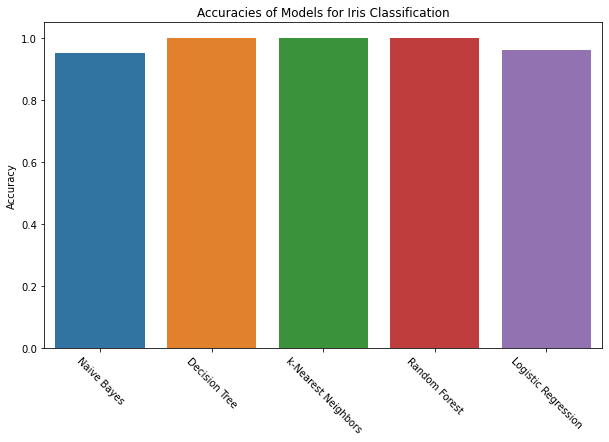

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x=df_acc.columns, y=df_acc.iloc[0], ax=ax)
ax.set_title("Accuracies of Models for Iris Classification")
ax.set_xticklabels(df_acc.columns, rotation=-45);

All of the models performed very well at this task, but, surprisingly, all the other models had a better accuracy than the Naive Bayes model. In fact, three of the models (KNN, Decision Trees and Random Forests) all had a perfect score on the entire dataset, which is impressive as we recall the fact that two of the species (Versicolor and Virginica) are not linearly seperable.